In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dill 
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from scipy.stats import wilcoxon
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [6]:
eeg_b = np.load(r'C:\Users\willy\Documents\GitHub\2021-fastReach\analyses\Willy_tests\11\eeg_11.npy')
chan = pd.read_csv('/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/11/\chans_rp-win_-1-0.csv', header=None)
# Select the best chans from the csv file to filter the eeg data
eeg = []
for i in chan.iloc[1:,0].astype(int)-1:  
    eeg.append(eeg_b[i,:])
eeg = np.asarray(eeg)

emg = np.load(r'C:\Users\willy\Documents\GitHub\2021-fastReach\analyses\Willy_tests\11\emg_11.npy')
velocity = np.load(r'C:\Users\willy\Documents\GitHub\2021-fastReach\analyses\Willy_tests\11\velocity_11.npy')
move = pd.read_csv('/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/11/\motion_onset_event_latencies.csv', header = None)
move = move.values[0]

<font size="3" color='orange'>    <b>Plot [-2s, 2s]</b>

In [97]:
fs    = 250
move  = move[1:-1]
s_bef = 3
s_aft = 3

before = s_bef * fs
after  = s_aft * fs

c_eeg      = np.zeros((eeg.shape[0],      (before + after) * len(move)))
c_emg      = np.zeros((emg.shape[0],      (before + after) * len(move)))
c_velocity = np.zeros((velocity.shape[0], (before + after) * len(move)))

for j in range(20):
    for i in range(len(move)):
        c_eeg     [j, (before+after)*i:(before+after)+(before+after)*i] =      eeg[j, move[i] - before : move[i] + after] - \
                                                                           eeg[j, move[i] - before]
        c_emg     [:, (before+after)*i:(before+after)+(before+after)*i] =      emg[:, move[i] - before : move[i] + after]
        c_velocity[:, (before+after)*i:(before+after)+(before+after)*i] = velocity[:, move[i] - before : move[i] + after]

In [100]:
eeg_elec = 1
emg_elec = 1

time = np.arange(-s_bef, s_aft, 1/fs)
time = np.tile(time, len(move)).transpose()
time = np.reshape(time, len(time))

data = pd.DataFrame([time, c_eeg[eeg_elec, :], c_emg[emg_elec, :]*100, c_velocity[0, :]*2000], 
                    index = ['Time', 'EEG', 'EMG', 'Velocity']).transpose()


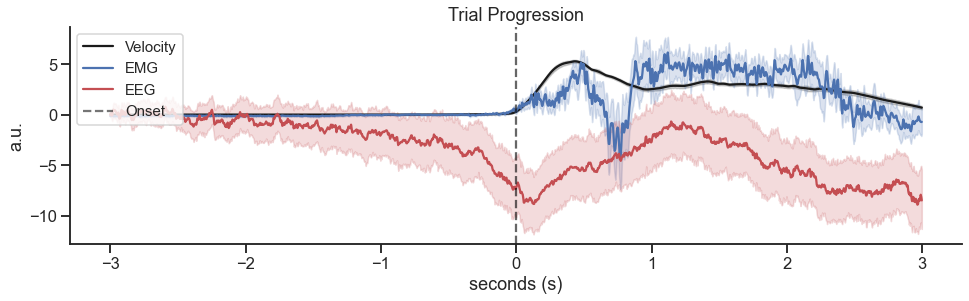

In [101]:
figure(figsize=(16, 4))

# Velocity
sns.set_theme(context='talk', style='ticks')
ep_move = sns.lineplot(data=data, x='Time', y='Velocity', color='k', legend=False)

ep_move.set(xlabel='seconds (s)', ylabel='a.u.', title='Trial Progression')
sns.despine()
ep_emg = sns.lineplot(data=data, x='Time', y='EMG', color='b', legend=False)
ep_eeg = sns.lineplot(data=data, x='Time', y='EEG', color='r', legend=False)

# Movement onset
plt.axvline(0, color='black', label = 'onset', linestyle ='--', alpha=0.6)

# legend
ep_move.legend(loc='upper left', handles=[Line2D([], [], marker='_', color="k", label='Velocity'), 
                                          Line2D([], [], marker='_', color="b", label='EMG'),
                                          Line2D([], [], marker='_', color="r", label='EEG'),
                                          Line2D([], [], linestyle ='--', alpha=0.6, color="k", label='Onset')],
                                        fontsize='15')
plt.savefig("trial-3+3.svg")